In [1]:
import pandas as pd
# Read the entire file into a DataFrame
df = pd.read_csv("vdjdb.txt", delimiter='\t')  # Assuming the file is tab-delimited, adjust if needed
# Display the DataFrame
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'reference.id', 'method', 'meta', 'cdr3fix',
       'vdjdb.score', 'web.method', 'web.method.seq', 'web.cdr3fix.nc',
       'web.cdr3fix.unmp'], dtype=object)

In [2]:
def remove_coloumn(df):
    df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
           'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
           'antigen.species','vdjdb.score', 'meta']]
    return df

In [3]:
df['species'].unique()

array(['HomoSapiens', 'MusMusculus', 'MacacaMulatta'], dtype=object)

In [4]:
pd.set_option('display.max_colwidth', None)
df[['meta']].head(3)

,meta
0,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*07:01,HLA-DRB*13:01"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""005"", ""tissue"": ""PBMC""}"
1,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*07:01,HLA-DRB*13:01"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""005"", ""tissue"": ""PBMC""}"
2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:01;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*08:03:2,HLA-DRB*15:01:1"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""065"", ""tissue"": ""PBMC""}"


In [5]:
pd.reset_option('display.max_colwidth')

filtered_df = df[df['complex.id'] == 4]
filtered_df.head(5)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
7,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAYRPPGTYKYIF"", ""cdr3_old"": ""CAYRPPG...",2,sort,sanger,no,no
8,4,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSALASLNEQFF"", ""cdr3_old"": ""CASSAL...",2,sort,sanger,no,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   complex.id        92771 non-null  int64 
 1   gene              92771 non-null  object
 2   cdr3              92771 non-null  object
 3   v.segm            92670 non-null  object
 4   j.segm            91626 non-null  object
 5   species           92771 non-null  object
 6   mhc.a             92771 non-null  object
 7   mhc.b             92771 non-null  object
 8   mhc.class         92771 non-null  object
 9   antigen.epitope   92771 non-null  object
 10  antigen.gene      92709 non-null  object
 11  antigen.species   92771 non-null  object
 12  reference.id      91260 non-null  object
 13  method            92771 non-null  object
 14  meta              92771 non-null  object
 15  cdr3fix           92771 non-null  object
 16  vdjdb.score       92771 non-null  int64 
 17  web.method  

In [7]:
df.dtypes

complex.id           int64
gene                object
cdr3                object
v.segm              object
j.segm              object
species             object
mhc.a               object
mhc.b               object
mhc.class           object
antigen.epitope     object
antigen.gene        object
antigen.species     object
reference.id        object
method              object
meta                object
cdr3fix             object
vdjdb.score          int64
web.method          object
web.method.seq      object
web.cdr3fix.nc      object
web.cdr3fix.unmp    object
dtype: object

In [8]:
df.shape

(92771, 21)

In [9]:
# Number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(120, 21)

In [10]:
df.count()

complex.id          92771
gene                92771
cdr3                92771
v.segm              92670
j.segm              91626
species             92771
mhc.a               92771
mhc.b               92771
mhc.class           92771
antigen.epitope     92771
antigen.gene        92709
antigen.species     92771
reference.id        91260
method              92771
meta                92771
cdr3fix             92771
vdjdb.score         92771
web.method          92771
web.method.seq      92771
web.cdr3fix.nc      92771
web.cdr3fix.unmp    92771
dtype: int64

### Dropping duplicate columns

In [11]:
# Drop duplicate rows
df=df.drop_duplicates()
df.shape

(92651, 21)

### Dropping missing and null value

In [12]:
print(df.isnull().sum())

complex.id             0
gene                   0
cdr3                   0
v.segm               101
j.segm              1144
species                0
mhc.a                  0
mhc.b                  0
mhc.class              0
antigen.epitope        0
antigen.gene          62
antigen.species        0
reference.id        1511
method                 0
meta                   0
cdr3fix                0
vdjdb.score            0
web.method             0
web.method.seq         0
web.cdr3fix.nc         0
web.cdr3fix.unmp       0
dtype: int64


In [13]:
df=df.dropna()
df.shape

(89952, 21)

**After dropping null value**
* Bulleted

In [14]:
print(df.isnull().sum())

complex.id          0
gene                0
cdr3                0
v.segm              0
j.segm              0
species             0
mhc.a               0
mhc.b               0
mhc.class           0
antigen.epitope     0
antigen.gene        0
antigen.species     0
reference.id        0
method              0
meta                0
cdr3fix             0
vdjdb.score         0
web.method          0
web.method.seq      0
web.cdr3fix.nc      0
web.cdr3fix.unmp    0
dtype: int64


<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>


<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

>**## Exploring the data ##**

In [15]:
# Specify the substring to search for
# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')
substring = 'CD8+'

# Use boolean indexing to filter rows containing the substring in 'Description'
filtered_df = df[df['meta'].str.contains(substring, case=False, na=False)]

filtered_df[filtered_df['mhc.class']=='MHCII'].head(3)



,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
5309,0,TRB,CASSKLASTAGEQYF,TRBV2*01,TRBJ2-7*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*11:01,MHCII,DRFYKTLRAEQASQEV,...,HIV-1,PMID:27760342,"{""frequency"": ""70/70"", ""identification"": ""tetr...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSKLASTAGEQYF"", ""cdr3_old"": ""CASSK...",1,sort,singlecell,no,no
5310,0,TRB,CASSGGQETQYF,TRBV14*01,TRBJ2-5*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*01:01,MHCII,LNKIVRMYSPTSILD,...,HIV-1,PMID:27760342,"{""frequency"": ""76/76"", ""identification"": ""tetr...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSGGQETQYF"", ""cdr3_old"": ""CASSGGQE...",1,sort,singlecell,no,no
5311,0,TRB,CASSWDSNYGYTF,TRBV5-5*01,TRBJ1-2*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*01:01,MHCII,DRFYKTLRAEQASQEV,...,HIV-1,PMID:27760342,"{""frequency"": ""23/23"", ""identification"": ""tetr...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSWDSNYGYTF"", ""cdr3_old"": ""CASSWDS...",1,sort,singlecell,no,no


In [16]:
# remove all the data with 0 complex.id
df = df[df['complex.id'] != 0]

In [17]:
df

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
6,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYEPGQVSHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSPGQGGDNEQFF"", ""cdr3_old"": ""CASSP...",0,sort,singlecell,no,no
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAPQGATNKLIF"", ""cdr3_old"": ""CAPQGATN...",2,sort,singlecell,no,no
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSLGAGGQETQYF"", ""cdr3_old"": ""CASSL...",2,sort,singlecell,no,no
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CLVGGSGGYNKLIF"", ""cdr3_old"": ""CLVGGS...",0,sort,singlecell,no,no


# Select data with vdjscore range from 1-3

In [18]:
def vdjscore(df):
    df = df[df['vdjdb.score'] != 0]
    return df

df=vdjscore(df)
df

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
6,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYEPGQVSHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92686,30552,TRB,CASSQGSGGNEQFF,TRBV4-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,FPQPEQPFPWQP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSQGSGGNEQFF"", ""cdr3_old"": ""CASSQG...",2,sort,singlecell,no,no
92689,30554,TRA,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,QLQPFPQPELPY,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAASVLYGSSNTGKLIF"", ""cdr3_old"": ""CAA...",2,sort,singlecell,no,no
92690,30554,TRB,CASSIVGSGGYNEQFF,TRBV19*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,QLQPFPQPELPY,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSIVGSGGYNEQFF"", ""cdr3_old"": ""CASS...",2,sort,singlecell,no,no
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAPQGATNKLIF"", ""cdr3_old"": ""CAPQGATN...",2,sort,singlecell,no,no


## Dropping null values

In [19]:
def drop_null(df):
    df.dropna()
    return df

In [20]:
df=drop_null(df)

## Dropping duplicates

In [21]:
df=df.drop_duplicates()
df.shape

(5623, 21)

##  TCRDist3

In [22]:
# df_dash = pd.read_csv("https://raw.githubusercontent.com/kmayerb/tcrdist2/API2/tcrdist/test_files_compact/dash.csv")

In [23]:
# df_dash.head(3)

## Installing tcrdist3 package ##

In [24]:
# pip install tcrdist3
# installing tcrdist3

In [25]:
# from tcrdist.repertoire import TCRrep
# tr = TCRrep(cell_df = df_dash, 
#             organism = 'mouse', 
#             chains = ['alpha','beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv')
# tr.pw_alpha
# # tr.pw_beta
# # tr.pw_cdr3_a_aa
# # tr.pw_cdr3_b_aa

In [26]:
# tr = TCRrep(cell_df = df_dash,
#             organism = 'mouse',
#             chains = ['alpha','beta'],
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)

# tr.cpus = 2
# tr.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
# tr.rw_beta
# # """<1920x1920 sparse matrix of type '<class 'numpy.int16'>'
# # with 108846 stored elements in Compressed Sparse Row format>
# # """
# # print(tr.rw_beta)    

In [27]:
# print(tr.rw_beta)    

## Preprocess vdjdb.text data frame for tcrdist3

In [28]:
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'reference.id', 'method', 'meta', 'cdr3fix',
       'vdjdb.score', 'web.method', 'web.method.seq', 'web.cdr3fix.nc',
       'web.cdr3fix.unmp'], dtype=object)

In [29]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'antigen.epitope', 'antigen.gene','antigen.species']]

In [30]:
df.head(3)

,complex.id,gene,cdr3,v.segm,j.segm,species,antigen.epitope,antigen.gene,antigen.species
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,HIV-1
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,HIV-1
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef,HIV-1


# Removing mouse and monkey

In [31]:
def seperate_species(df,species_A,species_B):
    df = df[~df['species'].isin([species_A,species_B])]
    return df

df_homo = seperate_species(df,'MacacaMulatta','MusMusculus')
df_mouse = seperate_species(df,'MacacaMulatta','HomoSapiens')
df_monkey = seperate_species(df,'MusMusculus','HomoSapiens')

# Separating data set in to alpha and beta dataframe

In [32]:
import pandas as pd

# Assuming df is your original dataframe
# Create separate dataframes for alpha and beta chains
def seperate_dataset(df):
    df_alpha = df[df['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene','antigen.epitope':'epitope'})
    df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene','antigen.epitope':'epitope'})

    return df_alpha,df_beta
# df = df.rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})
# df.drop([ 'cdr3', 'v.segm', 'j.segm'], axis=1, inplace=True)
# df = pd.concat([df_alpha, df_beta], ignore_index=True)
# df

In [33]:
def reset_index(df):
    df.reset_index(drop=True, inplace=True)
    return df

In [34]:
df_homo_alpha,df_homo_beta=seperate_dataset(df_homo)
df_mouse_alpha,df_mouse_beta=seperate_dataset(df_mouse)
df_monkey_alpha,df_monkey_beta=seperate_dataset(df_monkey)
reset_index(df_homo_alpha)
reset_index(df_homo_beta)
reset_index(df_mouse_alpha)
reset_index(df_mouse_beta)
reset_index(df_monkey_alpha)
reset_index(df_monkey_beta)

,complex.id,gene,cdr3_b_aa,v_b_gene,j_b_gene,species,epitope,antigen.gene,antigen.species


In [35]:
df_homo_alpha=df_homo_alpha.drop_duplicates()
df_homo_beta=df_homo_beta.drop_duplicates()

In [36]:
print(df_homo_alpha.shape)
print(df_homo_beta.shape)
print(df_mouse_alpha.shape)
print(df_mouse_beta.shape)

(1890, 9)
(1912, 9)
(899, 9)
(922, 9)


In [37]:
df_homo_alpha['species'].unique()

array(['HomoSapiens'], dtype=object)

## Run TCRDist on alpha gene dataset

In [38]:
from tcrdist.repertoire import TCRrep
tr_a = TCRrep(cell_df = df_homo_alpha, 
            organism = 'human', 
            chains = ['alpha'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances=False)
tr_a.cpus=2
tr_a.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
print(tr_a.rw_alpha)
tr_b = TCRrep(cell_df = df_homo_beta, 
            organism = 'human', 
            chains = ['beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances=False)
tr_b.cpus=2
tr_b.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
print(tr_b.rw_beta)


D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


  0%|          | 0/19 [00:00<?, ?it/s]

  (0, 0)	-1
  (0, 3)	-1
  (0, 5)	-1
  (0, 7)	-1
  (1, 1)	-1
  (1, 4)	-1
  (1, 6)	-1
  (1, 8)	-1
  (2, 2)	-1
  (2, 857)	42
  (3, 0)	-1
  (3, 3)	-1
  (3, 5)	-1
  (3, 7)	-1
  (4, 1)	-1
  (4, 4)	-1
  (4, 6)	-1
  (4, 8)	-1
  (5, 0)	-1
  (5, 3)	-1
  (5, 5)	-1
  (5, 7)	-1
  (6, 1)	-1
  (6, 4)	-1
  (6, 6)	-1
  :	:
  (1884, 188)	48
  (1884, 282)	48
  (1884, 386)	44
  (1884, 513)	44
  (1884, 1418)	39
  (1884, 1446)	48
  (1884, 1478)	50
  (1884, 1856)	27
  (1884, 1883)	42
  (1884, 1884)	-1
  (1884, 1885)	42
  (1885, 282)	42
  (1885, 1671)	24
  (1885, 1856)	30
  (1885, 1884)	42
  (1885, 1885)	-1
  (1886, 1886)	-1
  (1887, 1887)	-1
  (1888, 1888)	-1
  (1889, 345)	48
  (1889, 472)	48
  (1889, 1474)	45
  (1889, 1540)	36
  (1889, 1665)	48
  (1889, 1889)	-1


D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


  0%|          | 0/20 [00:00<?, ?it/s]

  (0, 0)	-1
  (0, 1)	39
  (0, 2)	36
  (0, 4)	-1
  (0, 5)	39
  (0, 6)	36
  (0, 7)	-1
  (0, 8)	39
  (0, 9)	36
  (0, 10)	-1
  (0, 11)	39
  (0, 12)	36
  (1, 0)	39
  (1, 1)	-1
  (1, 2)	39
  (1, 4)	39
  (1, 5)	-1
  (1, 6)	39
  (1, 7)	39
  (1, 8)	-1
  (1, 9)	39
  (1, 10)	39
  (1, 11)	-1
  (1, 12)	39
  (2, 0)	36
  :	:
  (1907, 1525)	48
  (1907, 1905)	15
  (1907, 1906)	21
  (1907, 1907)	-1
  (1908, 1908)	-1
  (1909, 842)	48
  (1909, 850)	36
  (1909, 853)	46
  (1909, 1743)	48
  (1909, 1909)	-1
  (1910, 198)	48
  (1910, 199)	48
  (1910, 403)	21
  (1910, 426)	45
  (1910, 534)	21
  (1910, 557)	45
  (1910, 946)	48
  (1910, 947)	48
  (1910, 1103)	36
  (1910, 1271)	33
  (1910, 1460)	46
  (1910, 1792)	45
  (1910, 1910)	-1
  (1911, 130)	36
  (1911, 1911)	-1


In [39]:
# print(type(tr_b.rw_beta))

In [40]:
# # combine the alpha chain and beta chain
# df_merge = pd.merge(df_alpha, df_beta, on='complex.id')
# df_merge.shape

In [41]:
# df_merge

In [42]:
# df_merge.drop(['species_y'], axis=1, inplace=True)
# df_merge.drop(['antigen.species_y'], axis=1, inplace=True)

In [43]:
# df_merge.species_x.value_counts()

In [44]:
# tr = TCRrep(cell_df = df_merge, 
#             organism = 'human', 
#             chains = ['alpha','beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances=False)
# tr.cpus=2
# tr.compute_sparse_rect_distances(radius = 50, chunk_size = 100)

In [45]:
# combined_rw_distance = tr.rw_alpha + tr.rw_beta

In [46]:
# combined_rw_distance.shape

In [47]:
from tcrdist.repertoire import TCRrep
def get_matrix(df_alpha,df_beta,species):
#     define a function to get the chain matrix
#     tr_a = TCRrep(cell_df = df_alpha, # get the alpha chain matrix
#             organism = species, 
#             chains = ['alpha'], 
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances=False)
#     tr_a.cpus=2
#     tr_a.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
#     tr_b = TCRrep(cell_df = df_beta,  # get the beta chain matrix
#                 organism = species, 
#                 chains = ['beta'], 
#                 db_file = 'alphabeta_gammadelta_db.tsv',
#                 compute_distances=False)
#     tr_b.cpus=2
#     tr_b.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
    df_merge = pd.merge(df_alpha, df_beta, on='complex.id') # combine alpha chain and beta chain
    df_merge.drop(['species_y'], axis=1, inplace=True) # drop extra column
    df_merge.drop(['antigen.species_y'], axis=1, inplace=True)
    df_merge.rename(columns={'antigen.species_x': 'antigen.species'}, inplace=True)
    tr = TCRrep(cell_df = df_merge, # get the combined chain matrix
            organism = species, 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances=False)
    tr.cpus=2
    tr.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
    combined_rw_distance = tr.rw_alpha + tr.rw_beta # add up the output of the combined chain result
    return tr.rw_alpha,tr.rw_beta,combined_rw_distance,df_merge

In [48]:
homo_alpha_matrix,homo_beta_matrix,homo_combined_matrix,df_homo_combined = get_matrix(df_homo_alpha,df_homo_beta,'human')
mouse_alpha_matrix,mouse_beta_matrix,mouse_combined_matrix,df_mouse_combined= get_matrix(df_mouse_alpha,df_mouse_beta,'mouse')

D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

In [119]:
df_mouse_combined


,complex.id,gene_x,cdr3_a_aa,v_a_gene,j_a_gene,species_x,epitope_x,antigen.gene_x,antigen.species,gene_y,cdr3_b_aa,v_b_gene,j_b_gene,epitope_y,antigen.gene_y,count
0,106,TRA,CAMRGDYGGSGNKLIF,TRAV16*01,TRAJ32*01,MusMusculus,INFDFNTI,Kctd20,MusMusculus,TRB,CTCSADRVGNTLYF,TRBV1*01,TRBJ1-3*01,INFDFNTI,Kctd20,1
1,108,TRA,CAVSGFASALTF,TRAV9-4*01,TRAJ35*01,MusMusculus,SIYRYYGL,Synthetic,Synthetic,TRB,CASGGGGTLYF,TRBV13-2*01,TRBJ2-4*01,SIYRYYGL,Synthetic,1
2,110,TRA,CAARYQGGRALIF,TRAV14-1*01,TRAJ15*01,MusMusculus,KVITFIDL,Gtpbp1,MusMusculus,TRB,CTCSAAPDWGASAETLYF,TRBV1*01,TRBJ2-3*01,KVITFIDL,Gtpbp1,1
3,112,TRA,CAVSGFASALTF,TRAV9-4*01,TRAJ35*01,MusMusculus,EQYKFYSV,Ndufa4,MusMusculus,TRB,CASGGGGTLYF,TRBV13-2*01,TRBJ2-4*01,EQYKFYSV,Ndufa4,1
4,113,TRA,CAMRGDYGGSGNKLIF,TRAV16*01,TRAJ32*01,MusMusculus,RGYVYQGL,N,VSV,TRB,CTCSADRVGNTLYF,TRBV1*01,TRBJ1-3*01,RGYVYQGL,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,27103,TRA,CAGGGNYKPTF,TRAV14-1*01,TRAJ6*01,MusMusculus,SIINFEKL,OVA,GallusGallus,TRB,CASSRANYEQYF,TRBV12-1*01,TRBJ2-7*01,SIINFEKL,OVA,1
895,27104,TRA,CAASDDNRIFF,TRAV14-1*01,TRAJ31*01,MusMusculus,SIINFEKL,OVA,GallusGallus,TRB,CASSRANYEQYF,TRBV12-1*01,TRBJ2-7*01,SIINFEKL,OVA,1
896,27247,TRA,CAAGDSGGSNYKLTF,TRAV19*01,TRAJ53*01,MusMusculus,VVVGAVGVGK,KRAS,HomoSapiens,TRB,CASASWGGYAEQFF,TRBV13-1*02,TRBJ2-1*01,VVVGAVGVGK,KRAS,1
897,27248,TRA,CAVSGGTNSAGNKLTF,TRAV3-3*01,TRAJ17*01,MusMusculus,VVGAVGVGK,KRAS,HomoSapiens,TRB,CASSRDWGPAEQFF,TRBV4*01,TRBJ2-1*01,VVGAVGVGK,KRAS,1


# Calculate Radius part(not done)

In [50]:
# import os
# import numpy as np
# import pandas as pd
# from tcrdist.repertoire import TCRrep
# from tcrdist.sample import _default_sampler
# from tcrdist.background import get_stratified_gene_usage_frequency
# from tcrdist.centers import calc_radii
# from tcrdist.public import _neighbors_sparse_variable_radius, _neighbors_variable_radius
# from tcrdist.public import TCRpublic
# from tcrdist.ecdf import _plot_manuscript_ecdfs
# import matplotlib.pyplot as plt
# from tcrsampler.setup_db import install_all_next_gen;

In [51]:
# install_all_next_gen(dry_run = False)
# df_test = df_beta.query('epitope == "PA"').\
#     reset_index(drop = True)

# tr = TCRrep(cell_df = df_test.copy(), 
#             organism = 'human', 
#             chains = ['beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)
# tr.cpus=2
# ts = _default_sampler(organism = "human", chain = "beta")()
# ts = get_stratified_gene_usage_frequency(ts = ts, replace = True)

In [52]:
# df_vj_background = tr.synthesize_vj_matched_background(ts = ts, chain = 'beta')
# trb = TCRrep(cell_df = df_vj_background.copy(), 
#             organism = 'human', 
#             chains = ['beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)
# tr.cpus = 2
# radii, thresholds, ecdfs = \
#     calc_radii(tr = tr, 
#         tr_bkgd = trb, 
#         chain = 'beta', 
#         ctrl_bkgd = 10**-5, 
#         use_sparse = True, 
#         max_radius=50)
# # tr.clone_df['radius'] = radii
# # tr.clone_df['radius'][tr.clone_df['radius'] > 26] = 26

In [53]:
# tr.clone_df['neighbors'] = _neighbors_variable_radius(
#     pwmat = tr.pw_beta, 
#     radius_list = tr.clone_df['radius'])

# Test the quality of matrix

In [54]:
import numpy as np

In [55]:
from scipy.sparse import csr_matrix
import numpy as np

def check_sparse_matrix_quality(sparse_matrix):
    if not isinstance(sparse_matrix, csr_matrix):
        raise ValueError("The matrix must be a CSR sparse matrix.")
    
    total_elements = sparse_matrix.shape[0] * sparse_matrix.shape[1]
    non_zero_elements = sparse_matrix.nnz
    zero_elements = total_elements - non_zero_elements
    
    # Calculate sparsity and fill ratio
    sparsity = zero_elements / total_elements
    fill_ratio = non_zero_elements / total_elements
    
    # Mean and standard deviation of non-zero elements
    non_zero_values = sparse_matrix.data
    mean_non_zero = np.mean(non_zero_values)
    std_dev_non_zero = np.std(non_zero_values)
    
    # Check for diagonal dominance
    diagonal_dominance = True
    for i in range(sparse_matrix.shape[0]):
        row_start = sparse_matrix.indptr[i]
        row_end = sparse_matrix.indptr[i+1]
        row_values = sparse_matrix.data[row_start:row_end]
        row_indices = sparse_matrix.indices[row_start:row_end]
        
        diagonal_value = 0
        if i in row_indices:
            diagonal_value = row_values[row_indices == i][0]
        
        if abs(diagonal_value) < np.sum(np.abs(row_values)) - abs(diagonal_value):
            diagonal_dominance = False
            break
    
    return {
        "sparsity": sparsity,
        "fill_ratio": fill_ratio,
        "mean_non_zero": mean_non_zero,
        "std_dev_non_zero": std_dev_non_zero,
        "diagonal_dominance": diagonal_dominance
    }


In [56]:
def print_quality(rw_alpha, rw_beta, combined_rw_distance,species):
#     define a function to print matrix quality
    quality_a = check_sparse_matrix_quality(rw_alpha)
    quality_b = check_sparse_matrix_quality(rw_beta)
    quality_c = check_sparse_matrix_quality(combined_rw_distance)
    print('Species :',species)
    print('Alpha chain:',quality_a)
    print('Beta chain:',quality_b)
    print('Combined chain:',quality_c)

In [57]:
print_quality(homo_alpha_matrix,homo_beta_matrix,homo_combined_matrix,'Human')
print_quality(mouse_alpha_matrix,mouse_beta_matrix,mouse_combined_matrix,'Mouse')

Species : Human
Alpha chain: {'sparsity': 0.9923801048557181, 'fill_ratio': 0.007619895144281868, 'mean_non_zero': 19.501411138053026, 'std_dev_non_zero': 19.174398518040253, 'diagonal_dominance': False}
Beta chain: {'sparsity': 0.988567885581324, 'fill_ratio': 0.011432114418675936, 'mean_non_zero': 26.700977664732534, 'std_dev_non_zero': 18.262096064309294, 'diagonal_dominance': False}
Combined chain: {'sparsity': 0.9846914528565747, 'fill_ratio': 0.015308547143425284, 'mean_non_zero': 29.646663105201718, 'std_dev_non_zero': 21.32221636743202, 'diagonal_dominance': False}
Species : Mouse
Alpha chain: {'sparsity': 0.96136975826558, 'fill_ratio': 0.03863024173442003, 'mean_non_zero': 16.469715896351815, 'std_dev_non_zero': 12.892091952998554, 'diagonal_dominance': False}
Beta chain: {'sparsity': 0.9667817782952508, 'fill_ratio': 0.03321822170474919, 'mean_non_zero': 26.029910232055723, 'std_dev_non_zero': 18.4141758077216, 'diagonal_dominance': False}
Combined chain: {'sparsity': 0.9395

In [58]:
homo_alpha_matrix

<1817x1817 sparse matrix of type '<class 'numpy.int16'>'
	with 25157 stored elements in Compressed Sparse Row format>

# Visualize part

In [59]:
# pip install umap-learn

In [60]:
# since we have the distance matrix which is in high dimension
# we have to lower the dimension
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from umap import UMAP
# Instantiating the SVD
svd = TruncatedSVD(n_components=2)
alpha_reduced = svd.fit_transform(homo_alpha_matrix)
beta_reduced = svd.fit_transform(homo_beta_matrix)
combined_reduced = svd.fit_transform(homo_combined_matrix)

In [61]:
tsne = TSNE(n_components=2, random_state=42, init="random")
 # use tsne to reduce dimension continuely can make the result more accurate
A_tsne = tsne.fit_transform(tr_a.rw_alpha)
B_tsne = tsne.fit_transform(tr_b.rw_beta)
C_tsne = tsne.fit_transform(homo_combined_matrix)

In [62]:
# combined_reduced.shape

<function matplotlib.pyplot.show(close=None, block=None)>

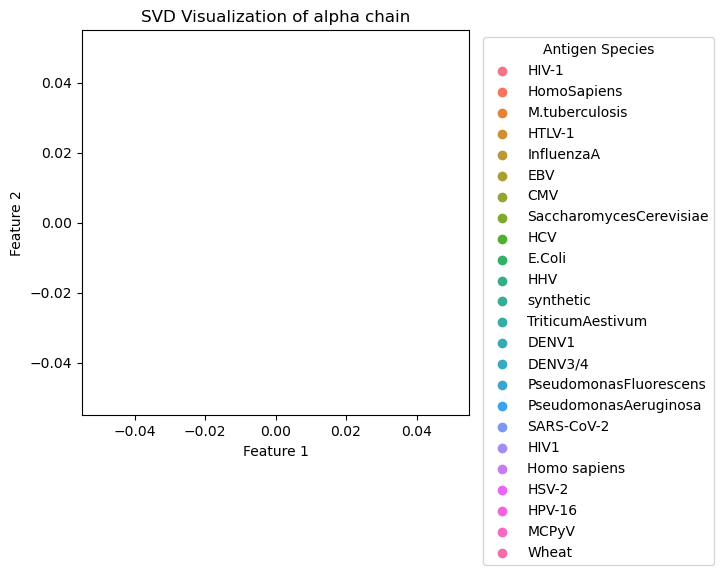

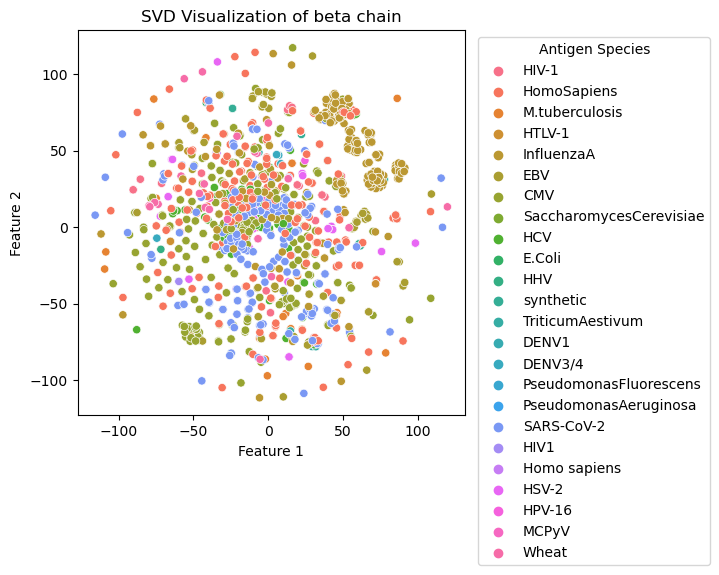

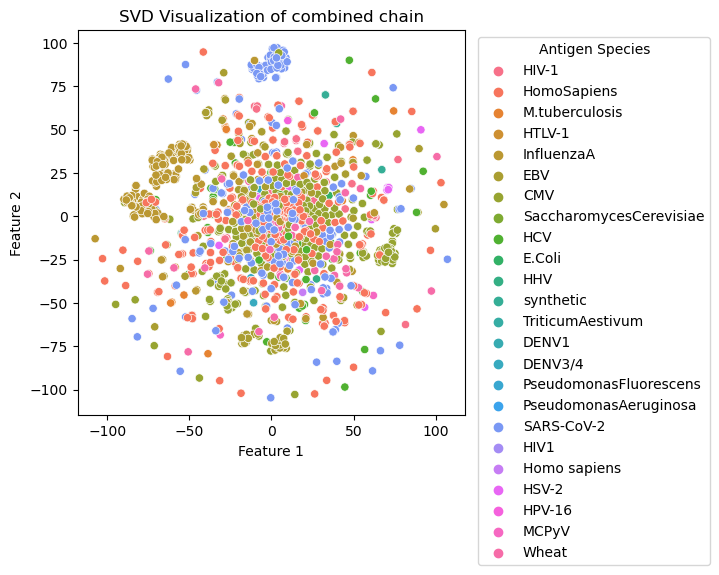

In [63]:
# SVD Visualization for alpha chain and beta chain
fig, ax0 = plt.subplots(figsize=(5, 5))
sns.scatterplot(A_tsne[:, 0], y=A_tsne[:, 1], hue=df_homo_alpha['antigen.species'], ax=ax0)
ax0.set_xlabel('Feature 1')
ax0.set_ylabel('Feature 2')
ax0.set_title('SVD Visualization of alpha chain')
ax0.legend(loc='upper right', bbox_to_anchor=(1.65,1),title='Antigen Species')
plt.show

fig, ax0 = plt.subplots(figsize=(5, 5))
sns.scatterplot(x=B_tsne[:, 0], y=B_tsne[:, 1], hue=df_homo_beta['antigen.species'], ax=ax0)
ax0.set_xlabel('Feature 1')
ax0.set_ylabel('Feature 2')
ax0.set_title('SVD Visualization of beta chain')
ax0.legend(loc='upper right', bbox_to_anchor=(1.65,1),title='Antigen Species')
plt.show

fig, ax0 = plt.subplots(figsize=(5, 5))
sns.scatterplot(x=C_tsne[:, 0], y=C_tsne[:, 1], hue=df_homo_combined['antigen.species'], ax=ax0)
ax0.set_xlabel('Feature 1')
ax0.set_ylabel('Feature 2')
ax0.set_title('SVD Visualization of combined chain')
ax0.legend(loc='upper right', bbox_to_anchor=(1.65,1),title='Antigen Species')
plt.show

In [64]:
# fig, ax0 = plt.subplots(figsize=(15, 10))
# sns.scatterplot(x=combined_reduced[:, 0], y=combined_reduced[:, 1], hue=df_merge['antigen.species_x'], ax=ax0)
# ax0.set_xlabel('Feature 1')
# ax0.set_ylabel('Feature 2')
# ax0.set_title('SVD Visualization of combined chain')
# ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')
# plt.show

In [65]:
#since the data is in very high dimension, to boost the speed of process
#frist using TruncatedSVD to lower the dimension to 50
# svd = TruncatedSVD(n_components=50)
# alpha_reduced = svd.fit_transform(tr_a.rw_alpha)
# beta_reduced = svd.fit_transform(tr_b.rw_beta)
# combined_reduced = svd.fit_transform(combined_rw_distance)
# explained_variance_ratio = svd.explained_variance_ratio_
# explained_variance_ratio

In [66]:
# alpha_reduced

In [67]:
#using Tsne

# tsne = TSNE(n_components=2, random_state=42)
# A_tsne = tsne.fit_transform(alpha_reduced)
# B_tsne = tsne.fit_transform(beta_reduced)
# # using UMAP

# umap = UMAP(n_components=2, random_state=42)
# A_umap = umap.fit_transform(alpha_reduced)
# B_umap = umap.fit_transform(beta_reduced)

In [68]:
# Instantiated Tsne for combined chain
# C_tsne=tsne.fit_transform(combined_reduced)

In [69]:
# Instantiated Umap for combined chain
# C_umap=umap.fit_transform(combined_reduced)

In [70]:
# from sklearn.decomposition import PCA

# # 创建PCA对象，设置要降维的目标维度为2
# pca = PCA(n_components=2)

# # 对稀疏矩阵进行PCA降维
# A_pca = pca.fit_transform(homo_alpha_matrix)
# B_pca= pca.fit_transform(beta_reduced)

In [71]:
# fig, ax1 = plt.subplots()

# # PCA Visualization of alpha chain
# sns.scatterplot(x=A_pca[:, 0], y=A_pca[:, 1],hue=df_alpha['antigen.species'], ax=ax1)
# ax1.set_xlabel('Feature 1')
# ax1.set_ylabel('Feature 2')
# ax1.set_title('PCA Visualization of alpha chain')
# ax1.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

# plt.show()

# fig, ax2 = plt.subplots()

# # PCA Visualization of beta chain
# sns.scatterplot(x=B_pca[:, 0], y=B_pca[:, 1], hue=df_beta['antigen.species'], ax=ax2)
# ax2.set_xlabel('Feature 1')
# ax2.set_ylabel('Feature 2')
# ax2.set_title('PCA Visualization of beta chain')
# ax2.legend(loc='upper right',bbox_to_anchor=(1.25,1), title='Antigen Species')

# plt.show()

In [72]:
# A_pca.shape


In [73]:
# # t-SNE Visualization for alpha chain and beta chain
# fig, ax0 = plt.subplots()

# sns.scatterplot(x=A_tsne[:, 0], y=A_tsne[:, 1], hue=df_alpha['antigen.species'], ax=ax0)
# ax0.set_xlabel('Feature 1')
# ax0.set_ylabel('Feature 2')
# ax0.set_title('t-SNE Visualization of alpha chain')
# ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

# fig, ax1 = plt.subplots(figsize=(15, 10))
# sns.scatterplot(x=B_tsne[:, 0], y=B_tsne[:, 1], hue=df_beta['antigen.species'], ax=ax1)
# ax1.set_xlabel('Feature 1')
# ax1.set_ylabel('Feature 2')
# ax1.set_title('t-SNE Visualization of beta chain')
# ax1.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

# plt.show()

In [74]:
# # t-SNE Visualization for combined chain
# fig, ax0 = plt.subplots()

# sns.scatterplot(x=C_tsne[:, 0], y=C_tsne[:, 1], hue=df_merge['antigen.species_x'], ax=ax0)
# ax0.set_xlabel('Feature 1')
# ax0.set_ylabel('Feature 2')
# ax0.set_title('t-SNE Visualization of combined chain')
# ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

In [75]:
# # UMAP Visualization for alpha chain and beta chain
# fig, ax0 = plt.subplots()

# sns.scatterplot(x=A_umap[:, 0], y=A_umap[:, 1], hue=df_alpha['antigen.species'], ax=ax0)
# ax0.set_xlabel('Feature 1')
# ax0.set_ylabel('Feature 2')
# ax0.set_title('UMAP Visualization of alpha chain')
# ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

# fig, ax1 = plt.subplots(figsize=(15, 10))
# sns.scatterplot(x=B_umap[:, 0], y=B_umap[:, 1], hue=df_beta['antigen.species'], ax=ax1)
# ax1.set_xlabel('Feature 1')
# ax1.set_ylabel('Feature 2')
# ax1.set_title('UMAP Visualization of beta chain')
# ax1.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

# plt.show()

In [76]:
# # UMAP Visualization for combined chain
# fig, ax0 = plt.subplots(figsize=(10, 10))

# sns.scatterplot(x=C_umap[:, 0], y=C_umap[:, 1], hue=df_merge['antigen.species_x'], ax=ax0)
# ax0.set_xlabel('Feature 1')
# ax0.set_ylabel('Feature 2')
# ax0.set_title('UMAP Visualization of combined chain')
# ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

In [77]:
# from the comparison of the two pictures,clearly the TSNE method are more likely to shows more defined clusters
# based on our dataset specificity,so we choose TSNE to cluster seperation clearluy

In [78]:
def reduce_dimension_tsne(rw_alpha, rw_beta, combined_rw_distance):
    svd = TruncatedSVD(n_components=50) # use svd to reduce dimension to 50 can shorten the process time
    alpha_reduced = svd.fit_transform(rw_alpha)
    beta_reduced = svd.fit_transform(rw_beta)
    combined_reduced = svd.fit_transform(combined_rw_distance)
    tsne = TSNE(n_components=2, random_state=42) # use tsne to reduce dimension continuely can make the result more accurate
    A_tsne = tsne.fit_transform(alpha_reduced)
    B_tsne = tsne.fit_transform(beta_reduced)
    C_tsne = tsne.fit_transform(combined_reduced)
    return A_tsne,B_tsne,C_tsne

In [79]:
def reduce_dimension_umap(rw_alpha, rw_beta, combined_rw_distance):
    svd = TruncatedSVD(n_components=50) # use svd to reduce dimension to 50 can shorten the process time
    alpha_reduced = svd.fit_transform(rw_alpha)
    beta_reduced = svd.fit_transform(rw_beta)
    combined_reduced = svd.fit_transform(combined_rw_distance)
    umap = UMAP(n_components=2, random_state=42) # use tsne to reduce dimension continuely can make the result more accurate
    A_umap = umap.fit_transform(alpha_reduced)
    B_umap = umap.fit_transform(beta_reduced)
    C_umap = umap.fit_transform(combined_reduced)
    return A_umap,B_umap,C_umap

In [80]:
homo_alpha_tsne,homo_beta_tsne,homo_combined_tsne = reduce_dimension_tsne(homo_alpha_matrix,homo_beta_matrix,homo_combined_matrix)
mouse_alpha_tsne,mouse_beta_tsne,mouse_combined_tsne = reduce_dimension_tsne(mouse_alpha_matrix,mouse_beta_matrix,mouse_combined_matrix)
homo_alpha_umap,homo_beta_umap,homo_combined_umap = reduce_dimension_umap(homo_alpha_matrix,homo_beta_matrix,homo_combined_matrix)
mouse_alpha_umap,mouse_beta_umap,mouse_combined_umap = reduce_dimension_umap(mouse_alpha_matrix,mouse_beta_matrix,mouse_combined_matrix)

D:\Anaconda\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Anaconda\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Anaconda\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no

In [81]:
def plot_graph(data,df,chain):

        # Create a new figure and axis
        fig, ax = plt.subplots()
        # Plot t-SNE visualization
        sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=df['antigen.species'], ax=ax)

        # Set labels and title
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_title(f'Visualization of {chain}')

        # Set legend
        ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1), title='Antigen Species')

        # Show the plot
        plt.show()

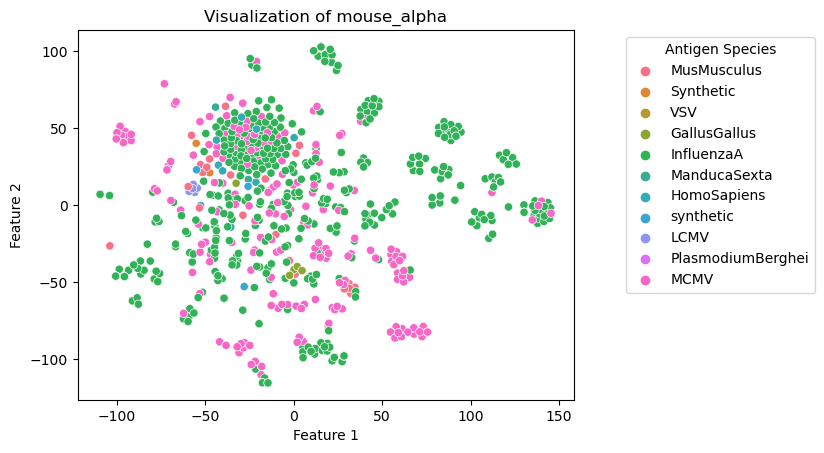

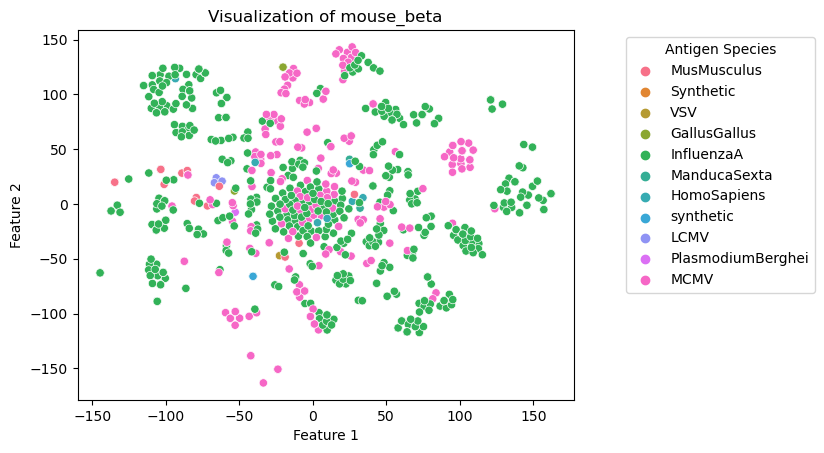

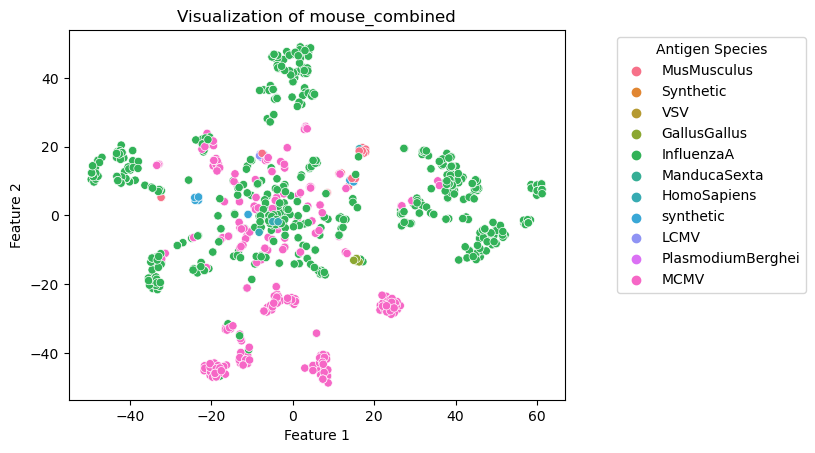

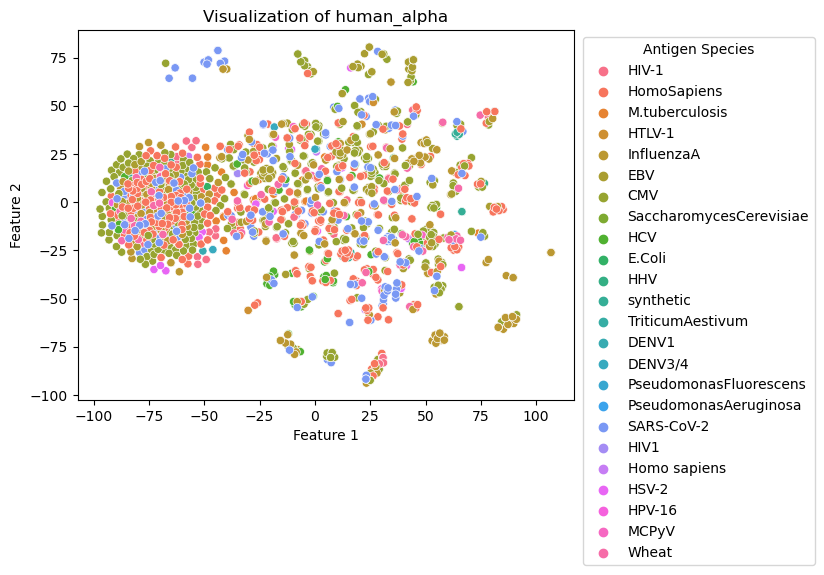

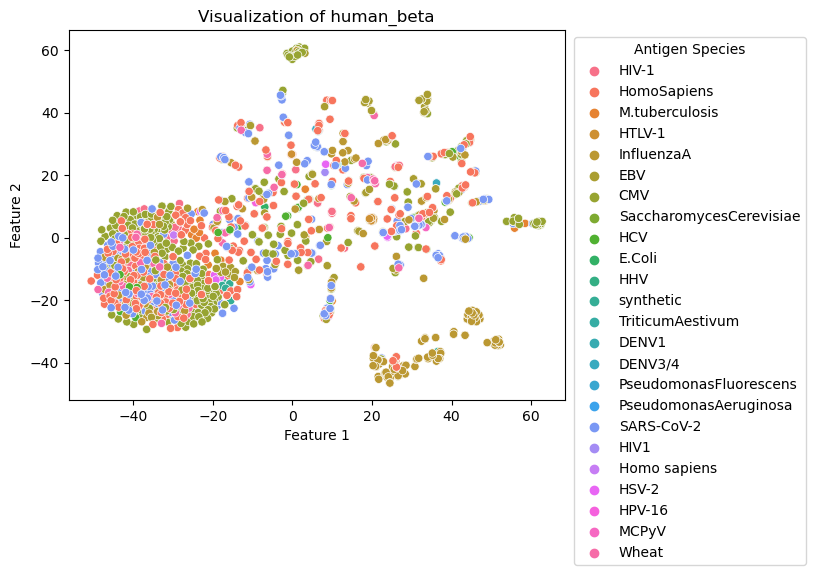

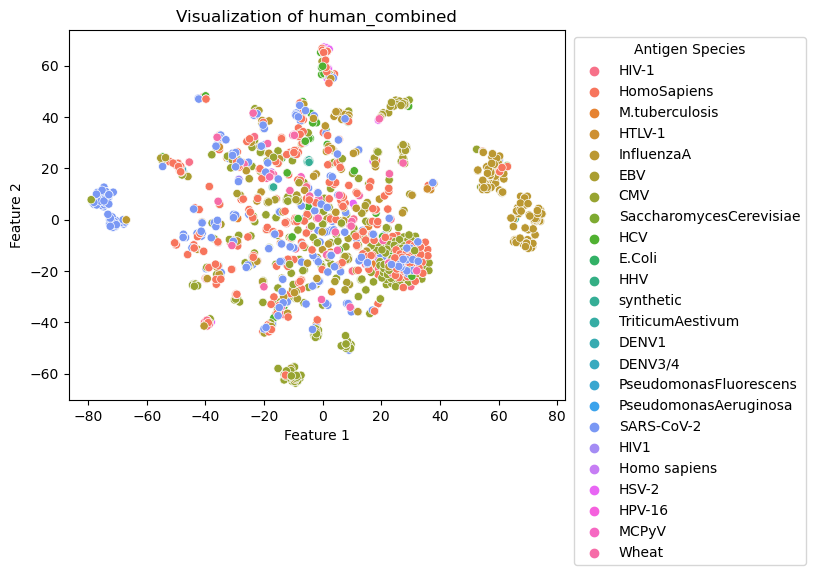

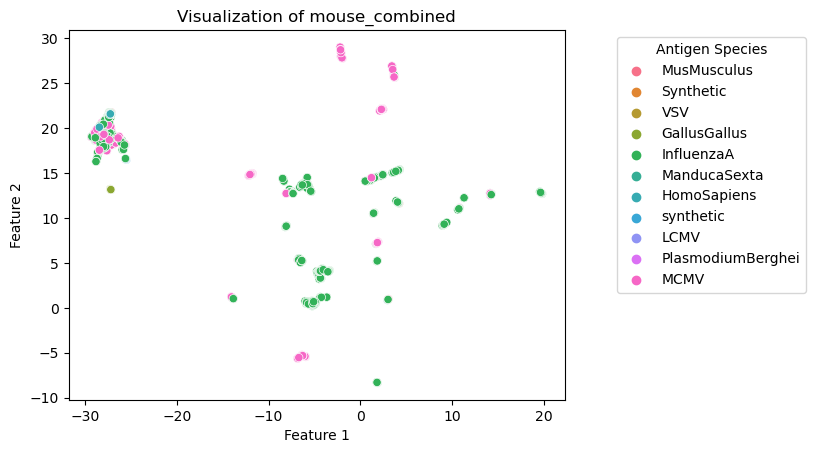

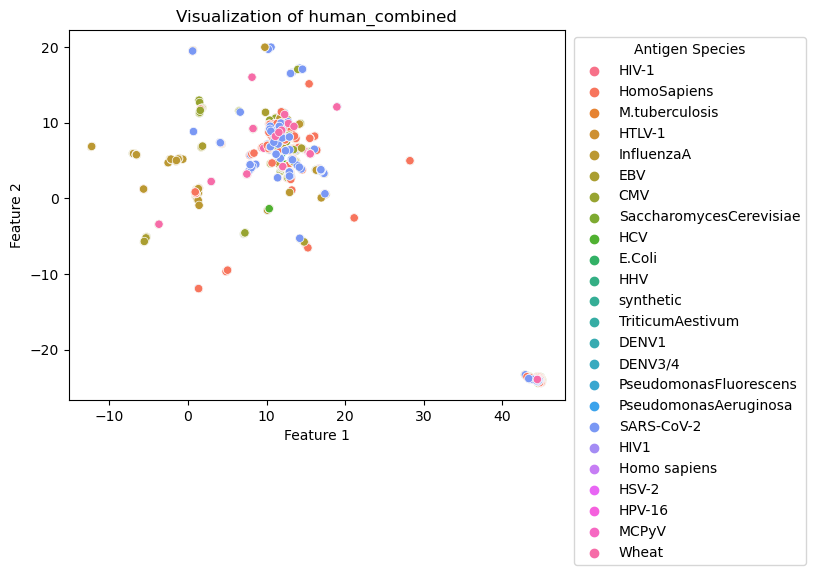

In [82]:
plot_graph(mouse_alpha_tsne,df_mouse_combined,'mouse_alpha')
plot_graph(mouse_beta_tsne,df_mouse_combined,'mouse_beta')
plot_graph(mouse_combined_tsne,df_mouse_combined,'mouse_combined')
plot_graph(homo_alpha_tsne,df_homo_combined,'human_alpha')
plot_graph(homo_beta_tsne,df_homo_combined,'human_beta')
plot_graph(homo_combined_tsne,df_homo_combined,'human_combined')
plot_graph(mouse_combined_umap,df_mouse_combined,'mouse_combined')
plot_graph(homo_combined_umap,df_homo_combined,'human_combined')

In [116]:
print(mouse_combined_tsne.shape)


(899, 2)


(899, 2)

In [118]:
mouse_combined_tsne

array([[-32.348637 ,   5.231629 ],
       [ 14.97311  ,   9.742705 ],
       [ -3.503473 ,  -0.7373654],
       ...,
       [ -4.906838 ,  -1.8113201],
       [ -8.256405 ,  -4.928373 ],
       [ -3.5875895,  -1.8580177]], dtype=float32)

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
from tcrdist.repertoire import TCRrep
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [110]:
def cluster_metrics(true_labels, cluster_labels):
    num_samples = len(true_labels)
    num_clusters = len(np.unique(cluster_labels))
    cluster_metrics = []

    # 计算匹配度和纯度
    for cluster in range(num_clusters):
        mask = (cluster_labels == cluster)
        cluster_samples = true_labels[mask]
        unique, counts = np.unique(cluster_samples, return_counts=True)
        max_count_index = np.argmax(counts)
        max_count = counts[max_count_index]
        purity = max_count / np.sum(counts)
        match_rate = max_count / np.sum(mask)
        cluster_metrics.append((match_rate, purity))

    return cluster_metrics

In [109]:
def K_MEANS(mx, true_labels):
    kmeans = KMeans(n_clusters = 11)
    clusters = kmeans.fit_predict(mx)

    # Visualization
    plt.scatter(mx[:, 0], mx[:, 1], c = clusters, cmap='viridis', s = 10)
    plt.xlabel('SVD Component 1')
    plt.ylabel('SVD Component 2')
    plt.title('KMeans Clustering')
    plt.colorbar(label='Cluster')
    plt.show()

    # 计算连接矩阵
    Z = linkage(mx, 'average')
    # 绘制分类的树状图
    plt.figure(figsize=(10, 5))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # 旋转叶子节点标签的角度
        leaf_font_size=8.,  # 叶子节点标签字体大小
    )
    plt.show()

    # print(clusters)
    metrics = cluster_metrics(true_labels, clusters)
    for i, (match_rate, purity) in enumerate(metrics):
        print(f"Cluster {i} - Match Rate: {match_rate}, Purity: {purity}")

    # Silhouette Score(轮廓系数): Higher Silhouette Score indicates better quality of clustering results(越高越好), Values in the range [-1, 1].
    print("Silhouette Score:", silhouette_score(mx, clusters))

    # Calinski-Harabasz index: Higher Calinski-Harabasz index indicates better quality of clustering results(越高越好)
    print("Calinski-Harabasz Index:", calinski_harabasz_score(mx, clusters))
    
    print(clusters)

In [111]:
def AHC(mx):
    n_clusters = 12  # number of clusters
    agglomerative_clustering = AgglomerativeClustering(n_clusters = n_clusters, linkage='average')
    clusters = agglomerative_clustering.fit_predict(mx)

    # Visualization
    plt.scatter(mx[:, 0], mx[:, 1], c=clusters, cmap='viridis', s=10)
    plt.xlabel('SVD Component 1')
    plt.ylabel('SVD Component 2')
    plt.title('Agglomerative Hierarchical Clustering')
    plt.colorbar(label='Cluster')
    plt.show()

    # 计算连接矩阵
    Z = linkage(mx, 'average')
    # 绘制分类的树状图
    plt.figure(figsize=(10, 5))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # 旋转叶子节点标签的角度
        leaf_font_size=8.,  # 叶子节点标签字体大小
    )
    plt.show()

    # Silhouette Score(轮廓系数): Higher Silhouette Score indicates better quality of clustering results(越高越好), Values in the range [-1, 1].
    silhouette_avg = silhouette_score(mx, clusters)
    # Calinski-Harabasz index: Higher Calinski-Harabasz index indicates better quality of clustering results(越高越好)
    calinski_harabasz_avg = calinski_harabasz_score(mx, clusters)
    return silhouette_avg, calinski_harabasz_avg

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


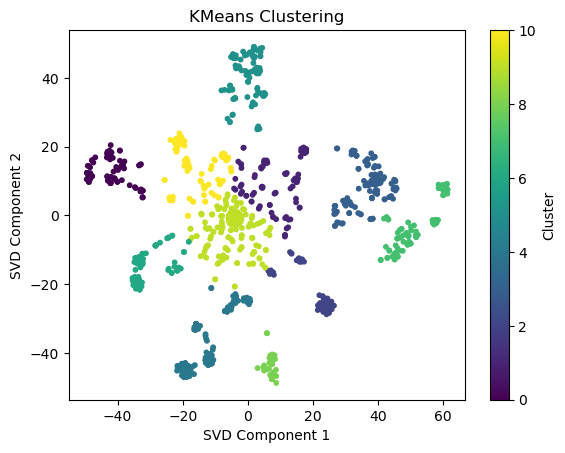

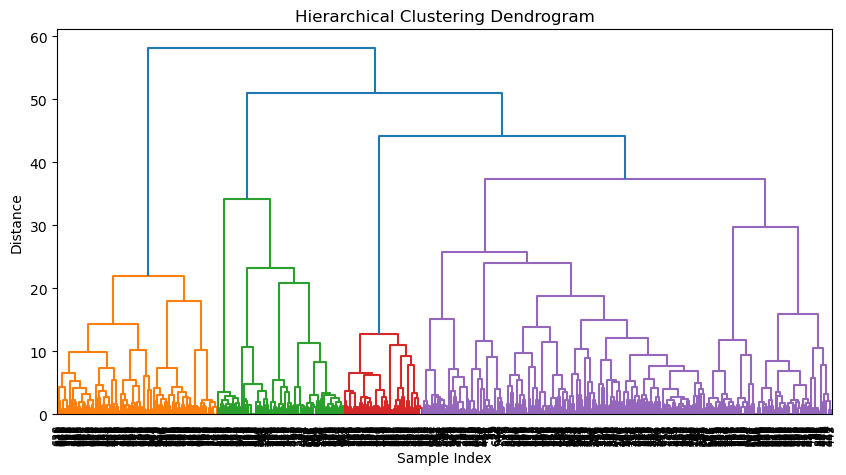

Cluster 0 - Match Rate: 0.9078947368421053, Purity: 0.9078947368421053
Cluster 1 - Match Rate: 0.47058823529411764, Purity: 0.47058823529411764
Cluster 2 - Match Rate: 0.6666666666666666, Purity: 0.6666666666666666
Cluster 3 - Match Rate: 0.9345794392523364, Purity: 0.9345794392523364
Cluster 4 - Match Rate: 0.9302325581395349, Purity: 0.9302325581395349
Cluster 5 - Match Rate: 0.9340659340659341, Purity: 0.9340659340659341
Cluster 6 - Match Rate: 0.921875, Purity: 0.921875
Cluster 7 - Match Rate: 0.9873417721518988, Purity: 0.9873417721518988
Cluster 8 - Match Rate: 0.9705882352941176, Purity: 0.9705882352941176
Cluster 9 - Match Rate: 0.6158940397350994, Purity: 0.6158940397350994
Cluster 10 - Match Rate: 0.41975308641975306, Purity: 0.41975308641975306
Silhouette Score: 0.50192827
Calinski-Harabasz Index: 1372.3562336897896
[ 0  1  9  1  0  1  1  0  1  1  1  5  9  1  9  9  9  1  1  1  1  1  1  1
  1  9  9  1 10 10 10 10 10 10 10 10  1  1  5 10 10 10  9  9 10 10  9  9
  1 10  1  1  1

In [112]:
    # Silhouette Score(轮廓系数): Higher Silhouette Score indicates better quality of clustering results(越高越好), Values in the range [-1, 1].
    silhouette_avg = []

    # Calinski-Harabasz index: Higher Calinski-Harabasz index indicates better quality of clustering results(越高越好)
    calinski_harabasz_avg = []
    
    true_labels = df_mouse_combined['antigen.species']
    # K-Means Clustering
    K_MEANS(mouse_combined_tsne, true_labels)

In [92]:
# pip install tensorflow

In [122]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 假设 mouse_combined_tsne 是你的特征矩阵，true_labels 是对应的标签数组
X = mouse_combined_tsne
y = true_labels  # 确保你有相应的标签

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练模型
model = SVC()
model.fit(X_train, y_train)

# 预测和评估
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' 未加权平均; 'micro' 给出总体 TP, FN 和 FP 的比例
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
# Accuracy:  0.8
# Precision:  0.24405348346235045
# Recall:  0.22927748491281635
# F1 Score:  0.2300664451827243

Accuracy:  0.8
Precision:  0.24405348346235045
Recall:  0.22927748491281635
F1 Score:  0.2300664451827243


D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 创建随机森林分类器实例
model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators是树的数量

# 训练模型
model.fit(X_train, y_train)
# 进行预测
y_pred = model.predict(X_test)

# 计算并打印性能指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

importances = model.feature_importances_
print("Feature importances:", importances)
# Accuracy:  0.8888888888888888
# Precision:  0.6717721806217382
# Recall:  0.7527729408677813
# F1 Score:  0.7049485280837999

Accuracy:  0.8888888888888888
Precision:  0.6717721806217382
Recall:  0.7527729408677813
F1 Score:  0.7049485280837999
Feature importances: [0.42644772 0.57355228]


D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 创建梯度提升分类器实例
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 计算并打印性能指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
# Accuracy:  0.8166666666666667
# Precision:  0.58242343397536
# Recall:  0.6078905075972616
# F1 Score:  0.5873833025381698

Accuracy:  0.8166666666666667
Precision:  0.58242343397536
Recall:  0.6078905075972616
F1 Score:  0.5873833025381698


D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 创建KNN分类器实例
# n_neighbors为K值，可以调整以优化模型性能
knn = KNeighborsClassifier(n_neighbors=3)

# 训练模型（KNN是基于实例的学习，这里“训练”只是加载数据）
knn.fit(X_train, y_train)

# 进行预测
y_pred = knn.predict(X_test)

# 计算并打印性能指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

# Accuracy:  0.8611111111111112
# Precision:  0.5704466258711541
# Recall:  0.6204969527467024
# F1 Score:  0.5866829514824798

Accuracy:  0.8611111111111112
Precision:  0.5704466258711541
Recall:  0.6204969527467024
F1 Score:  0.5866829514824798


D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import SimpleRNN, Dense
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# # 假设 time_series 是你的一维时间序列数据
# sequences = pd.concat([df_mouse_combined['cdr3_a_aa'], df_mouse_combined['cdr3_b_aa']])
# # 使用Tokenizer进行字符级的独热编码
# tokenizer = Tokenizer(char_level=True)
# tokenizer.fit_on_texts(sequences)
# encoded_seqs = tokenizer.texts_to_sequences(sequences)
# encoded_seqs = pad_sequences(encoded_seqs, padding='post')
# # 定义窗口大小和步长
# window_size = 4
# step_size = 1

# # 创建一个空的列表来存储每个窗口的平均值
# alpha_averages = []
# beta_averages = []
# # 滑动窗口
# for i in range(0, len(alpha_sequence) - window_size + 1, step_size):
#     window = time_series[i:i + window_size]
#     window_average = np.mean(window)
#     alpha_averages.append(window_average)

# for i in range(0, len(alpha_sequence) - window_size + 1, step_size):
#     window = time_series[i:i + window_size]
#     window_average = np.mean(window)
#     beta_averages.append(window_average)

# # # 这是你的数据占位符。
# # # 你需要用你实际的数据集来替换它。
# # # 这里，它仅仅是一个从0到99的整数序列。
# # # 将输入数据重塑为格式[samples, time steps, features]
# # # 在这个例子中，我们有100个样本，1个时间步长，1个特征。
# X = sequence[:-1].reshape((99, 1, 1))
# # y = sequence[1:].reshape((99, 1))

# # # 定义一个RNN模型
# # model = Sequential([
# #     # input_shape是(1, 1)，因为每个样本有1个时间步长和1个特征。
# #     SimpleRNN(10, input_shape=(1, 1), activation='relu'),
# #     Dense(1)
# # ])

# # # 编译模型
# # model.compile(optimizer='adam', loss='mse')

# # # 训练模型
# # model.fit(X, y, epochs=200, verbose=0)

# # # 展示预测
# # # 让我们预测100之后的下一个数字
# # test_input = np.array([100]).reshape((1, 1, 1))
# # predicted_number = model.predict(test_input)

# # print(f'预测的数字：{predicted_number}')
